<a href="https://colab.research.google.com/github/luisperafan97/mapa-markmap/blob/main/trabajo_limpieza_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA + Limpieza de Datos: Dirty Cafe Sales
**Dataset:** dirty_cafe_sales.csv  

**Objetivo:** se realizara el análisis exploratorio y limpieza de datos, identificando y corrigiendo valores faltantes, inconsistencias, tipos incorrectos y valores raros.

**razon de la base de daros:** se eligio esta base de datos en concreto desde la pagina kagle y en concreto Dirty Cafe Sales porque es una base de datos que de base hay datos que a propocito tiene valores faltantes, valores inconsistentes, espacios extra entre otras cosas que nos dejaran ver de manera mas clara como EDA + Limpieza de Datos trabajan de la mano para darnos un producto final mas consistente con el ejercio.

**Integrantes:**

**- Juan Manuel Canizales**

**- Samuel Carabali**

**- Sofhia Duque**


In [ ]:
import pandas as pd              # Librería principal para manipulación y análisis de datos en tablas
import numpy as np               # Librería para operaciones numéricas y manejo de valores como NaN
import matplotlib.pyplot as plt  # Librería para generar gráficos y visualizaciones


# Configuración para mostrar todas las columnas sin que se oculten en la salida
pd.set_option("display.max_columns", None)

# Configuración para el ancho de impresión de las tablas en pantalla
pd.set_option("display.width", 140)

ruta = "/content/dirty_cafe_sales.csv"  # Ruta donde se encuentra el archivo CSV dentro de nuentros archivos
df = pd.read_csv(ruta)                  # lee el archivo CSV y almacena en un DataFrame en este caso le ponemos df

df.head()  # ahora verificamos que si hicimos lo anterior bien desplegando las primiras 5 filas del data set como verificacion


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


## Estructura y vista general
 Aca revisamos tamaño, tipos de datos y una muestra inicial para entender cómo está construida la base de datos.

In [ ]:
print("Filas, columnas:", df.shape)
# Muestra número de filas, número de columnas ademas nos muestra el tamaño de la base de datos desde el inicio
df.info()
# Proporciona un resumen general del DataFrame como nombre de columnas cantidad de valores no nulos entre otra informacion general de la base de datos
df.sample(5, random_state=42)
# Muestra 5 filas aleatorias del dataset para inspeccionar datos sin sesgo del orden original y con el random nos da la posibilidad de que siempre se obtenga la misma muestra



Filas, columnas: (10000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
6252,TXN_2919952,Juice,NaN,3.0,15.0,Digital Wallet,In-store,2023-02-17
4684,TXN_4265056,Juice,1,3.0,3.0,Cash,NaN,2023-07-16
1731,TXN_2463115,Sandwich,5,4.0,20.0,Credit Card,Takeaway,2023-09-12
4742,TXN_7619641,Juice,3,3.0,9.0,NaN,In-store,2023-04-02
4521,TXN_9566593,Cake,2,3.0,6.0,Digital Wallet,NaN,2023-09-30


In [ ]:
df.describe(include="all").T
# crea estadísticas descriptivas para todas las columnas del dataset desde cualitativas hasta cuantitativas
# ademas hace media, desviación estándar, mínimo, precentiles, frecuencias
# T transpone la tabla para que las variables queden como filas para hacer mas facil la lectura y el análisis



,count,unique,top,freq
Transaction ID,10000,10000,TXN_9226047,1
Item,9667,10,Juice,1171
Quantity,9862,7,5,2013
Price Per Unit,9821,8,3.0,2429
Total Spent,9827,19,6.0,979
Payment Method,7421,5,Digital Wallet,2291
Location,6735,4,Takeaway,3022
Transaction Date,9841,367,UNKNOWN,159


## 2. Calidad de los datos
Identificamos valores faltantes, duplicados y valores problemáticos como **unknow** o **error**

In [ ]:
# Nulos
df.isna().sum().sort_values(ascending=False)
# Calcula la cantidad de valores faltantes NaN en cada columna del dataset

# df.isna() genera una matriz booleana donde True indica un valor faltante
# .sum() cuenta cuántos valores faltantes hay por columna
# .sort_values(ascending=False) ordena las columnas de mayor a menor cantidad de NaN
# importante para la limpieza porque identificamos los valores que no estan

,0
Location,3265
Payment Method,2579
Item,333
Price Per Unit,179
Total Spent,173
Transaction Date,159
Quantity,138
Transaction ID,0


In [ ]:
# Duplicados
df.duplicated().sum()
# Calcula cuántas filas están completamente duplicadas en el dataset

np.int64(0)

In [ ]:
# Valores "raros" típicos en datasets sucios
for col in ["Payment Method", "Location", "Total Spent"]:
    # recorre una lista de columnas donde es común encontrar inconsistencias
    if col in df.columns:  # Verifica que la columna exista en el dataset
        print("\n---", col, "---")  # Encabezado para identificar la columna analizada

        print(df[col].value_counts(dropna=False).head(15))
        # value_counts() cuenta la frecuencia de cada valor único en la columna
        # dropna=False incluye los valores faltantes NaN en el conteo
        # .head(15) muestra solo los 15 valores más frecuentes para facilitar la lectura

        # Esta parte es importante porque nos deja ver Valores "UNKNOWN" o "ERROR" o valores que no tiene sentido para empezar a limpiar




--- Payment Method ---
Payment Method
NaN               2579
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: count, dtype: int64

--- Location ---
Location
NaN         3265
Takeaway    3022
In-store    3017
ERROR        358
UNKNOWN      338
Name: count, dtype: int64

--- Total Spent ---
Total Spent
6.0     979
12.0    939
3.0     930
4.0     923
20.0    746
15.0    734
8.0     677
10.0    524
2.0     497
9.0     479
5.0     468
16.0    444
25.0    259
7.5     237
1.0     232
Name: count, dtype: int64


## 3. Limpieza de datos.E standarización y tipos
Se crea una copia limpia del dataset y se convierten variables numéricas o fechas a su formato correcto.


In [ ]:
df_clean = df.copy()

#aca lo que hacemos es quitar espacios y pasar a formato al cual podamos estandarizar el lenguaje (variables cualitativas)
text_cols = ["Item", "Payment Method", "Location"]
for c in text_cols:
    if c in df_clean.columns:
        df_clean[c] = df_clean[c].astype(str).str.strip()

# hacemos lo mismo de estandarizar el lenguaje pero ya con variables cuantitativas
for c in ["Quantity", "Price Per Unit", "Total Spent"]:
    if c in df_clean.columns:
        df_clean[c] = pd.to_numeric(df_clean[c], errors="coerce")  # ERROR -> NaN

# las fechas tienen una estructira mas especifica entonces lo hacemos dese un bloque de codigo aparte de los otros bloques de variables cualitativas y cuantitativas
if "Transaction Date" in df_clean.columns:
    df_clean["Transaction Date"] = pd.to_datetime(df_clean["Transaction Date"], errors="coerce")

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


## 4. Tratamiento de valores faltantes e inconsistentes
vamos a entrar a valores que marcan error o no se conocen **UNKNOWN**  **O** **ERROR**


In [ ]:
# Reemplazar UNKNOWN por NaN para que en ves de que piense que es un valor normal sino que es faltante
for c in ["Payment Method", "Location"]:
    if c in df_clean.columns:
        df_clean[c] = df_clean[c].replace(["UNKNOWN", "Unknown", "unknown"], np.nan)
# Esto lo hacemos para que pueda hacer calculos mejor

# Resumen de nulos
df_clean.isna().sum().sort_values(ascending=False)


,0
Price Per Unit,533
Total Spent,502
Quantity,479
Transaction Date,460
Location,338
Payment Method,293
Transaction ID,0
Item,0


In [ ]:
# vamos a imputar moda
# vamos a imputar mediana
num_cols = ["Quantity", "Price Per Unit", "Total Spent"]
# donde aplicaremos mediana
cat_cols = ["Item", "Payment Method", "Location"]
#donde aplicaremos moda

for c in num_cols:
    if c in df_clean.columns and df_clean[c].isna().any():
        df_clean[c] = df_clean[c].fillna(df_clean[c].median())

for c in cat_cols:
    if c in df_clean.columns and df_clean[c].isna().any():
        df_clean[c] = df_clean[c].fillna(df_clean[c].mode().iloc[0])

# en cuanto a las Fechas si hay nulos se eliminar porque no se pueden inferir fácilmente
if "Transaction Date" in df_clean.columns:
    df_clean = df_clean.dropna(subset=["Transaction Date"])

df_clean.isna().sum()
#aca ya la limpieza esta echa y si todo quedo bien deberian aparecer solo ceros

,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0


## 5. Validaciones de consistencia
Comprobamos que Total Spent = Quantity * Price Per Unit.
Si hay diferencias grandes, se corrige o se reporta como inconsistencia.


In [ ]:
df_clean["Calculated Total"] = df_clean["Quantity"] * df_clean["Price Per Unit"]
df_clean["Difference"] = df_clean["Total Spent"] - df_clean["Calculated Total"]

df_clean[["Quantity", "Price Per Unit", "Total Spent", "Calculated Total", "Difference"]].head(10)


,Quantity,Price Per Unit,Total Spent,Calculated Total,Difference
0,2.0,2.0,4.0,4.0,0.0
1,4.0,3.0,12.0,12.0,0.0
2,4.0,1.0,8.0,4.0,4.0
3,2.0,5.0,10.0,10.0,0.0
4,2.0,2.0,4.0,4.0,0.0
5,5.0,4.0,20.0,20.0,0.0
6,3.0,3.0,9.0,9.0,0.0
7,4.0,4.0,16.0,16.0,0.0
8,5.0,3.0,15.0,15.0,0.0
9,5.0,4.0,20.0,20.0,0.0


In [ ]:
# ahora miramos que tan grande es la diferencia
df_clean["Difference"].describe()


,Difference
count,9540.000000
mean,-0.066876
std,1.915059
min,-17.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,16.000000


In [ ]:
# vamos a calcular cuando la diferencia es alta:
threshold = 0.01  # tolerancia por decimales
mask = df_clean["Difference"].abs() > threshold
mask.mean()


np.float64(0.11876310272536687)

In [ ]:
# ahora hacemos la Corrección
df_clean.loc[mask, "Total Spent"] = df_clean.loc[mask, "Calculated Total"]
df_clean["Difference"] = df_clean["Total Spent"] - df_clean["Calculated Total"]

df_clean["Difference"].abs().max()


0.0

## 6. visualizaciones
vamos a ver las distribuciones, métodos de pago, ventas por ítem y evolución temporal graficamente basado en nuestra base de datos.


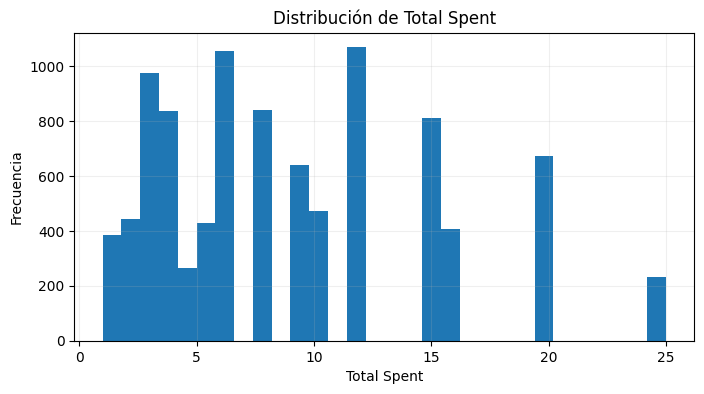

In [ ]:
# Distribución de Total Spent
plt.figure(figsize=(8,4))
plt.hist(df_clean["Total Spent"], bins=30)
plt.title("Distribución de Total Spent")
plt.xlabel("Total Spent")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.2)
plt.show()


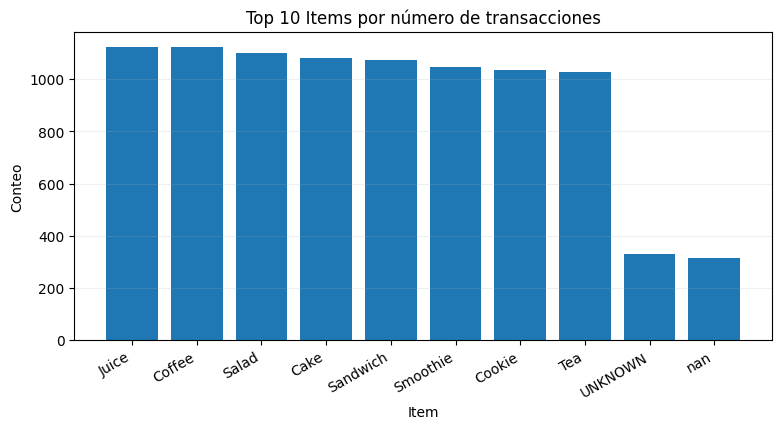

In [ ]:
# Top 10 productos por número de transacciones
top_items = df_clean["Item"].value_counts().head(10)
plt.figure(figsize=(9,4))
plt.bar(top_items.index, top_items.values)
plt.title("Top 10 Items por número de transacciones")
plt.xlabel("Item")
plt.ylabel("Conteo")
plt.xticks(rotation=30, ha="right")
plt.grid(True, axis="y", alpha=0.2)
plt.show()


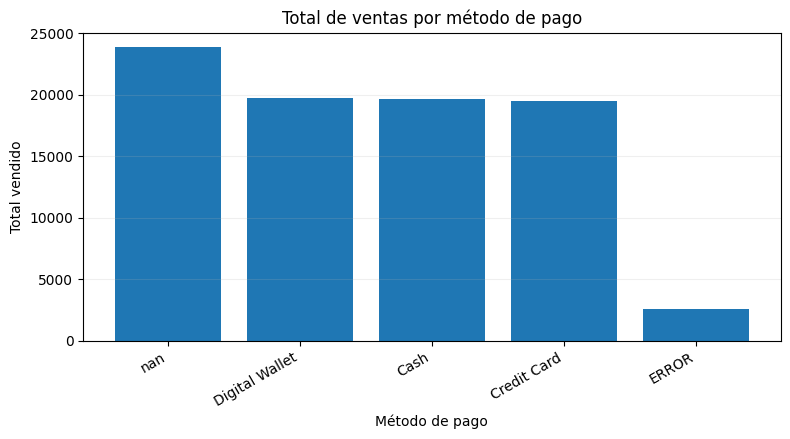

In [ ]:
# Ventas totales por método de pago
pay_sales = df_clean.groupby("Payment Method")["Total Spent"].sum().sort_values(ascending=False)
plt.figure(figsize=(9,4))
plt.bar(pay_sales.index.astype(str), pay_sales.values)
plt.title("Total de ventas por método de pago")
plt.xlabel("Método de pago")
plt.ylabel("Total vendido")
plt.xticks(rotation=30, ha="right")
plt.grid(True, axis="y", alpha=0.2)
plt.show()


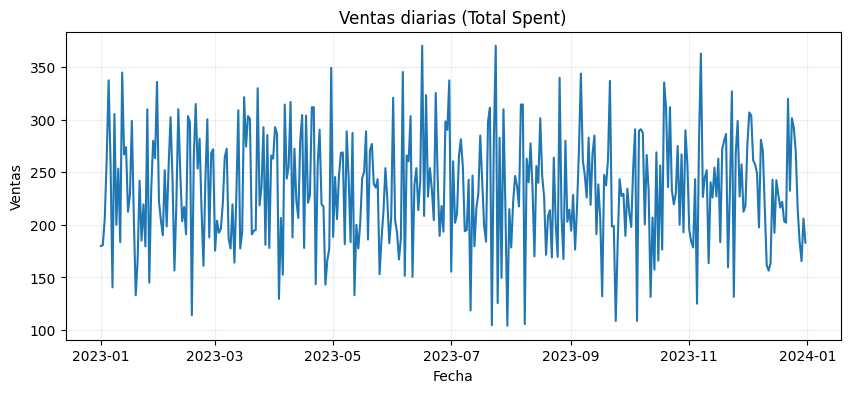

In [ ]:
# Ventas por fecha o tendencia
daily = df_clean.groupby("Transaction Date")["Total Spent"].sum()
plt.figure(figsize=(10,4))
plt.plot(daily.index, daily.values)
plt.title("Ventas diarias (Total Spent)")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid(True, alpha=0.2)
plt.show()


## 7. Conclusiones
- Pudimos identificar problemas de calidad de datos como valores UNKNOWN, ERROR y incorrectos.

- Transformamos variables numéricas y fechas a tipos de valores consistente para que nuestro programa pudiera leer la base de datos de manera optima.

- Se imputaron valores faltantes con criterios de mediana o moda dependiendo de el caso y se eliminaron fechas inválidas.

- Se validó consistencia entre Quantity, Price Per Unit y Total Spent, y se corrigieron inconsistencias.

- Despues de la limpieza nuestra base de datos queda listo para el análisis con datos limpios.